In [1]:
import pandas as pd
import numpy as np
import random

"""
Пример генерации данных свойства волокна на основе случайной зависимости от 5-ти параметров
"""

from datetime import datetime, timedelta

current_time = datetime.utcnow()
half_day = timedelta(hours=4)

start_date = (current_time - half_day).replace(microsecond=0)
end_date = (current_time + half_day).replace(microsecond=0)
time_measurements = pd.date_range(start=start_date, end=end_date, freq="s")

# Генерация случайных данных для каждого параметра
pressure_data = np.random.normal(loc=900, scale=20, size=len(time_measurements))
temperature_data = np.random.normal(loc=25, scale=15, size=len(time_measurements))
humidity_data = np.random.normal(loc=50, scale=10, size=len(time_measurements))
temperature_other_location_data = np.random.normal(
    loc=20, scale=3, size=len(time_measurements)
)
pressure_other_location_data = np.random.normal(
    loc=900, scale=50, size=len(time_measurements)
)


# Создание случайной функции зависимости для модуля упругости волокна
def generate_elastic_modulus(
    pressure, temperature, humidity, temperature_other_location, pressure_other_location
):
    return (
        100
        + 10 * np.log10(pressure) * (temperature / pressure) ** 2 * humidity / 10
        + 3 * np.sqrt(temperature_other_location)
        + 2 * np.log(pressure_other_location)
        + random.uniform(-0.5, 0.5)
    )


# Генерация данных модуля упругости волокна
elastic_modulus_data = [
    generate_elastic_modulus(p, t, h, t_other, p_other)
    for p, t, h, t_other, p_other in zip(
        pressure_data,
        temperature_data,
        humidity_data,
        temperature_other_location_data,
        pressure_other_location_data,
    )
]

# Создание DataFrame
data = {
    "Time": time_measurements,
    "Pressure_unit1": pressure_data,
    "Temperature_unit1": temperature_data,
    "Humidity_unit1": humidity_data,
    "Temperature_unit2": temperature_other_location_data,
    "Pressure_unit2": pressure_other_location_data,
    "Elastic Modulus": elastic_modulus_data,
}

df = pd.DataFrame(data)

df.to_csv("data.csv")

C:\Users\boiko.k.v\AppData\Local\Temp\ipykernel_21436\1577613273.py:11: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  current_time = datetime.utcnow()


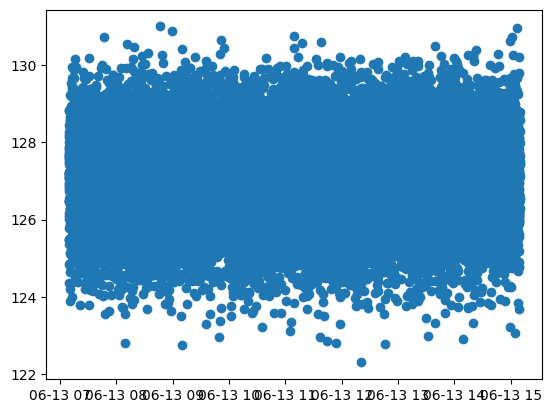

In [2]:
import matplotlib.pyplot as plt

plt.scatter(df["Time"], df["Elastic Modulus"])
# plt.scatter(df['Time'], df['Temperature'])
# plt.plot(df['Time'], df['Pressure'])

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X = df[
    [
        "Pressure_unit1",
        "Temperature_unit1",
        "Humidity_unit1",
        "Temperature_unit2",
        "Pressure_unit2",
    ]
]
y = df[["Elastic Modulus"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

r2_score(y_test, model.predict(X_test))

c:\Users\boiko.k.v\Desktop\Carbon-Digital-Twin\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.9157103462561966

In [4]:
result = model.predict(
    np.array(
        [
            998.1821814923298,
            38.86996368433553,
            44.84928580824408,
            19.28626281738893,
            964.4550391073768,
        ]
    ).reshape(1, -1)
)
result.tolist()[0]

c:\Users\boiko.k.v\Desktop\Carbon-Digital-Twin\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


127.20870927009793

In [5]:
import pickle

with open("random_forest_model.pkl", "wb") as f:
    pickle.dump(model, f)